# Analysis: Pairwise stats

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
climind = pd.read_csv("../climate_indices.csv")
climind = climind.set_index(["model", "time", "index"]).unstack(level=-1)["value"]
climind

index                        ENSO34       NAO     NASSS       SAM  \
model time                                                          
CESM  2350-01-16 12:00:00  2.277095  1.571751  1.874270 -1.546850   
      2350-02-15 00:00:00  1.881192  1.635490  1.417219 -0.450651   
      2350-03-16 12:00:00  1.510816  0.489595  1.486656  1.113378   
      2350-04-16 00:00:00  1.034762  0.473761  1.668092  0.219565   
      2350-05-16 12:00:00  0.702846  2.401551  1.570375 -1.119818   
...                             ...       ...       ...       ...   
FOCI  3349-08-16 12:00:00  1.137735  1.207901 -0.644193 -2.818380   
      3349-09-16 00:00:00  1.269963  1.404237 -0.445290 -0.025392   
      3349-10-16 12:00:00  1.186615  1.190851 -0.071331 -0.583593   
      3349-11-16 00:00:00  1.289584 -1.419175  0.285482 -0.335713   
      3349-12-16 12:00:00  1.097104 -0.685174  0.194064 -2.209260   

index                      SASTAI-north-all  SASTAI-north-land  \
model time                                                       
CESM  2350-01-16 12:00:00          0.589119          -0.125697   
      2350-02-15 00:00:00          0.416205          -0.126968   
      2350-03-16 12:00:00          0.003920          -0.202954   
      2350-04-16 00:00:00         -0.331293           0.052876   
      2350-05-16 12:00:00         -0.308961          -0.136650   
...                                     ...                ...   
FOCI  3349-08-16 12:00:00          0.759930           0.301656   
      3349-09-16 00:00:00          0.552130           0.369138   
      3349-10-16 12:00:00          0.340707           0.233714   
      3349-11-16 00:00:00         -0.070333          -0.098911   
      3349-12-16 12:00:00         -0.265883          -0.232896   

index                      SASTAI-north-ocean  SASTAI-south-all  \
model time                                                        
CESM  2350-01-16 12:00:00            0.714817          0.351391   
      2350-02-15 00:00:00            0.543172          0.161275   
      2350-03-16 12:00:00            0.206874          0.316841   
      2350-04-16 00:00:00           -0.384170          0.653733   
      2350-05-16 12:00:00           -0.172310         -0.408196   
...                                       ...               ...   
FOCI  3349-08-16 12:00:00            0.458274          0.032344   
      3349-09-16 00:00:00            0.182991          0.296314   
      3349-10-16 12:00:00            0.106993          0.152463   
      3349-11-16 00:00:00            0.028578          0.251348   
      3349-12-16 12:00:00           -0.032987          0.155058   

index                      SASTAI-south-land  SASTAI-south-ocean  
model time                                                        
CESM  2350-01-16 12:00:00           0.203287            0.148104  
      2350-02-15 00:00:00           0.135181            0.026094  
      2350-03-16 12:00:00           0.133291            0.183550  
      2350-04-16 00:00:00           0.056534            0.597199  
      2350-05-16 12:00:00          -0.114107           -0.294089  
...                                      ...                 ...  
FOCI  3349-08-16 12:00:00           0.094027           -0.061683  
      3349-09-16 00:00:00           0.097585            0.198730  
      3349-10-16 12:00:00          -0.060000            0.212463  
      3349-11-16 00:00:00           0.057160            0.194188  
      3349-12-16 12:00:00           0.021694            0.133363  

[23988 rows x 10 columns]

In [3]:
sns.set_style("darkgrid")

CPU times: user 28 s, sys: 330 ms, total: 28.3 s
Wall time: 28 s


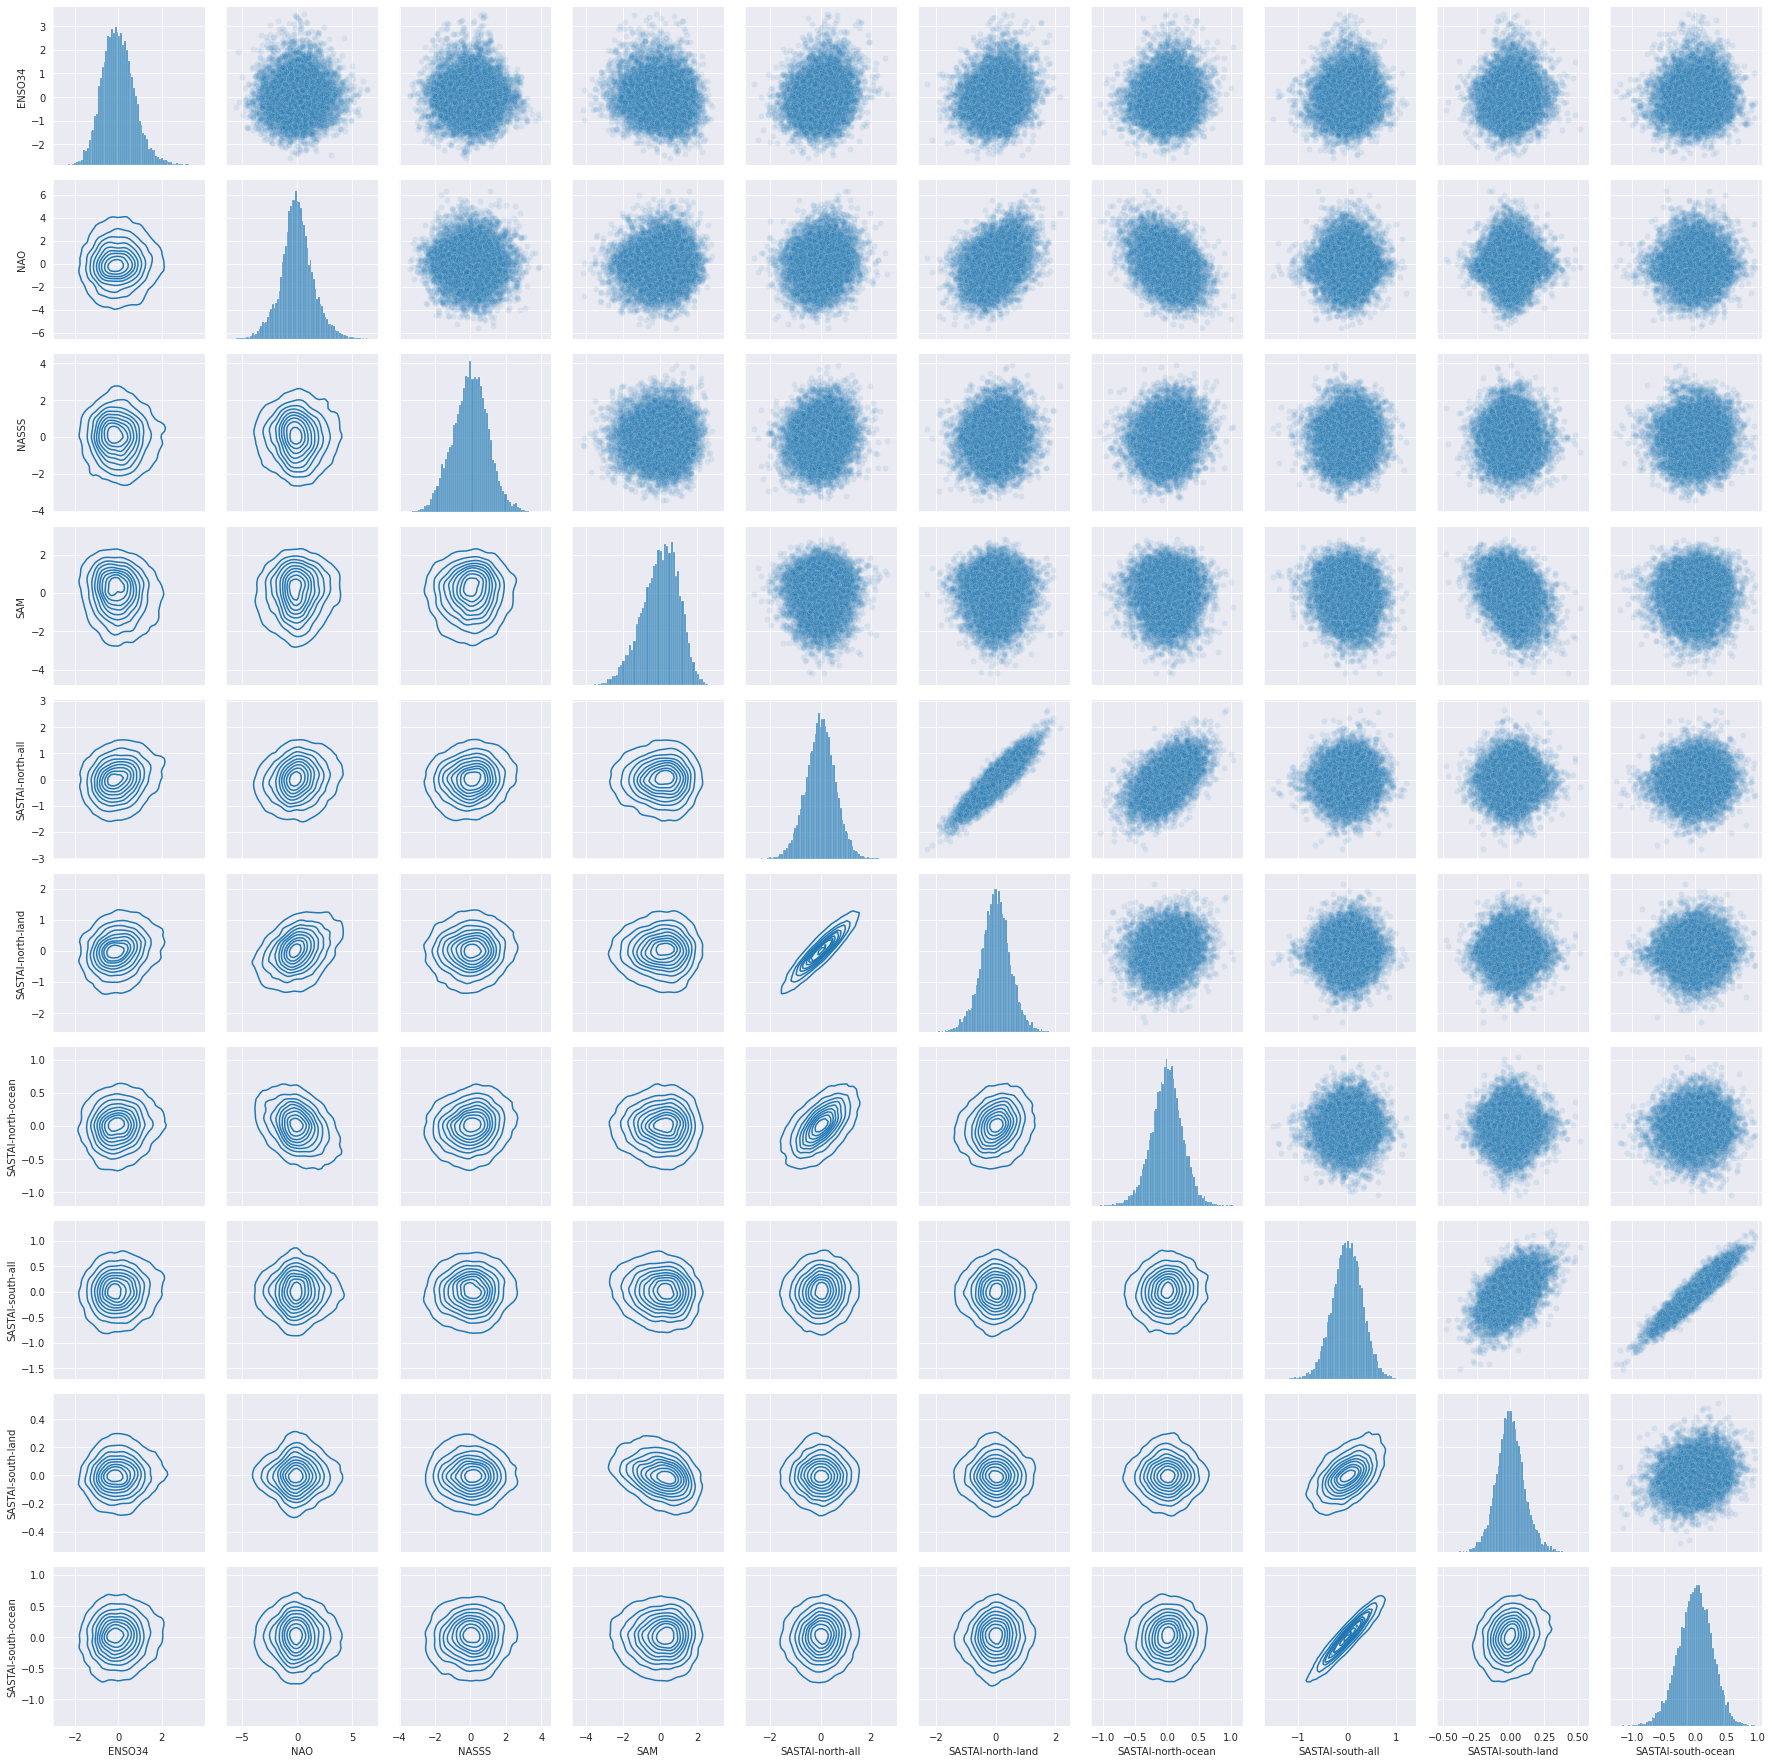

In [4]:
%%time

g = sns.PairGrid(
    climind.loc["FOCI"]
)
g.map_upper(sns.scatterplot, alpha=0.1)
g.map_lower(
    sns.kdeplot,
    gridsize=50,  # Controls level of detail in the KDE plot. Default is 200.
)
g.map_diag(sns.histplot)

g.savefig("pairwise_stats_FOCI.png")

CPU times: user 28.4 s, sys: 370 ms, total: 28.8 s
Wall time: 28.5 s


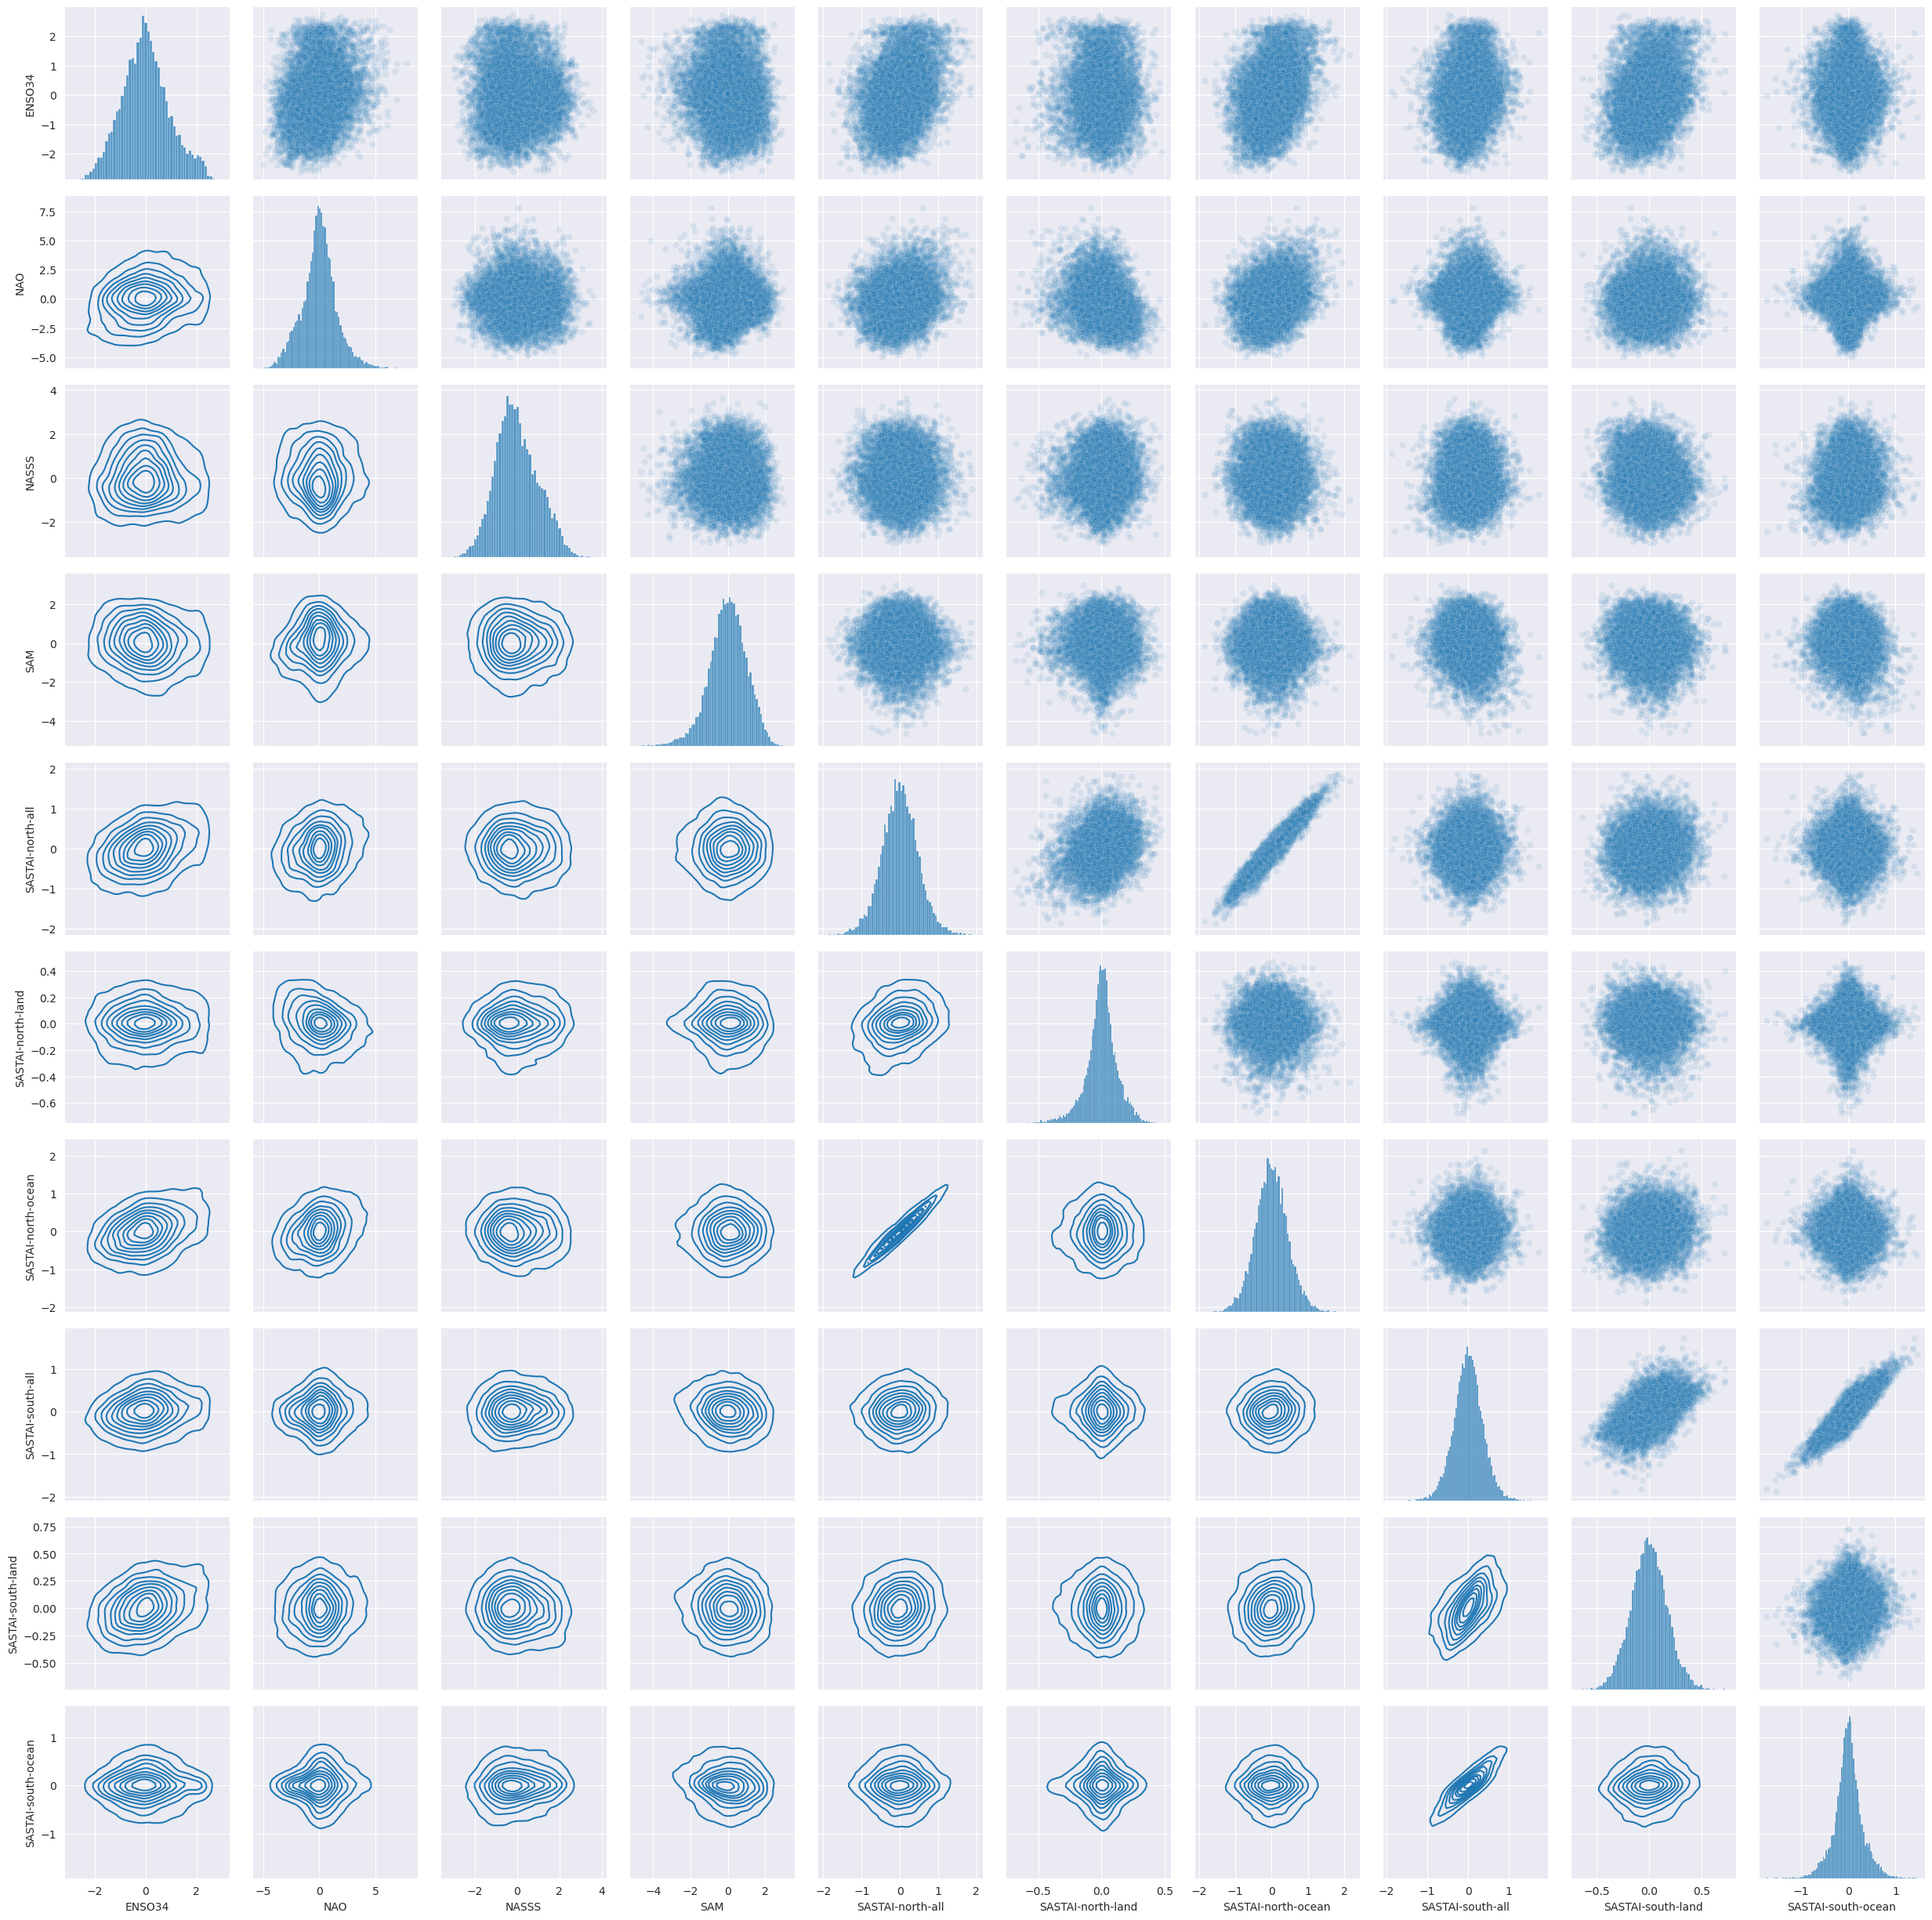

In [5]:
%%time

g = sns.PairGrid(
    climind.loc["CESM"]
)
g.map_upper(sns.scatterplot, alpha=0.1)
g.map_lower(
    sns.kdeplot,
    gridsize=50,  # Controls level of detail in the KDE plot. Default is 200.
)
g.map_diag(sns.histplot)

g.savefig("pairwise_stats_CESM.png")